In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
!unzip Reviews.zip

Archive:  Reviews.zip
replace Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Reviews.csv             


In [ ]:
df=pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['Text']=df['Text'].apply(denoise_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


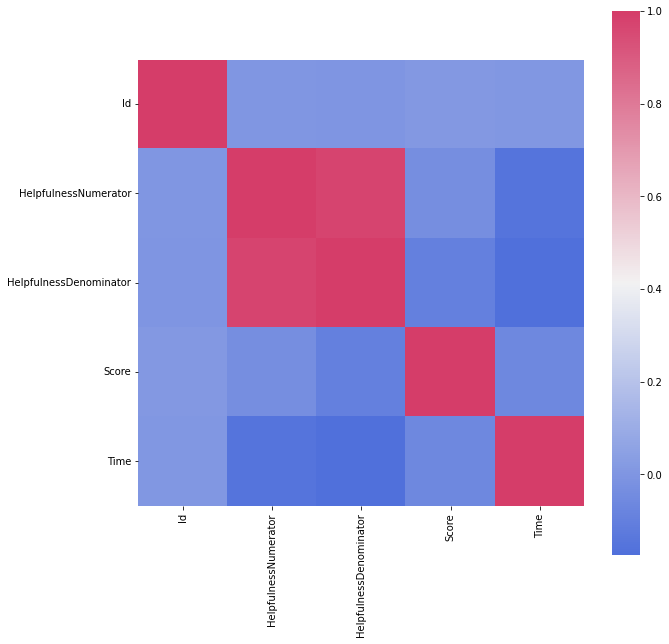

In [ ]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [ ]:
del df['Id']
del df['Time']
del df['UserId']
del df['ProductId']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']

In [ ]:
df['Text'] = df['Text'] + ' ' + df['Summary'] + ' ' + df['ProfileName']
del df['Summary']
del df['ProfileName']
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [ ]:
def score_sentiment(score):
    # Replace scores of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(score == 1 or score == 2 or score == 3):
        return 0
    else:
        return 1
df.Score = df.Score.apply(score_sentiment) 

In [ ]:
df.head()

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


In [ ]:
df.to_csv('reviews_cleaned.gz', compression='gzip')

In [ ]:
df.Text.fillna("",inplace = True)

In [ ]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)

In [ ]:
df.Text = df.Text.apply(stem_text)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.Text,df.Score,random_state = 0)

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (426340, 2485966)
BOW_cv_test: (142114, 2485966)


In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=0)


In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)

In [ ]:
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8005052281970813


In [ ]:
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

              precision    recall  f1-score   support

           0       0.98      0.09      0.17     31133
           1       0.80      1.00      0.89    110981

    accuracy                           0.80    142114
   macro avg       0.89      0.55      0.53    142114
weighted avg       0.84      0.80      0.73    142114



In [ ]:
# TF - IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(x_train)
tf_x_test = vectorizer.transform(x_test)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [ ]:
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=0)

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
svc_tfidf_report=classification_report(y_test,y_test_pred,target_names=['0','1'])
print(svc_tfidf_report)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     31133
           1       0.94      0.97      0.95    110981

    accuracy                           0.93    142114
   macro avg       0.90      0.88      0.89    142114
weighted avg       0.92      0.93      0.93    142114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.Text,df.Score)
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(x_train)
tf_x_test = vectorizer.transform(x_test)

In [ ]:
clf = RandomForestClassifier()
clf.fit(tf_x_train,y_train)
y_test_pred=clf.predict(tf_x_test)
tfidf_report=classification_report(y_test,y_test_pred,target_names=['0','1'])
print(tfidf_report)

In [ ]:
# models = [
#     { "estimater": KNeighborsClassifier(),
#       "params": {
#           "n_neighbors": [25],
#           "weights": ['uniform','distance'],
#           "leaf_size": [25]
#         }
#     },
#     { "estimater": LogisticRegression(),
#       "params": {
#           "penalty": 'l2',
#           "max_iter": [500],
#         }
#     },
#     { "estimater": DecisionTreeClassifier(),
#       "params": {
#           "criterion": ['gini'],
#           "splitter": ['random'],
#           "max_depth": [95],
#           "max_features": ["log2"],
#           "random_state": [42]
#       }
#     },
#     { "estimater": MultinomialNB(),
#       "params": {
#           "fit_prior": [True]    
#       }
#     },
#     { "estimater": LinearSVC(),
#       "params": {
#           "random_state": [0],
#       }
#     },
    
#     { "estimater": RandomForestClassifier(),
#       "params": {
#       "criterion": ['gini'],
#       "bootstrap": [False],
#       "max_depth": [100],
#       "max_features": ['sqrt'],
#       "n_estimators": [90],
#       "random_state": [42]
#       }
#     },
#     { "estimater": SGDClassifier(),
#       "params": {
#           "loss": ['log'], 
#           "penalty": ['l2'], 
#           "alpha": [0.0001],
#           "early_stopping": [True],
#           "max_iter": [1000],
#           "random_state": [42]
#       }
#     }
# ]

# column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "RFC", "SGDClassifier"]
# entries = []

# highest_acc = 0
# best_model = None

In [ ]:
# for model in models:
#     print(model["estimater"])

#     clf = model["estimater"]
#     grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], n_jobs = -1)
#     grid_search.fit(tf_x_train, y_train);

#     predicted = grid_search.predict(tf_x_test)
#     acc = accuracy_score(predicted, y_test)
#     print(acc)
#     entries.append(acc)

#     print(grid_search.best_params_)

#     if acc > highest_acc:
#         highest_acc = acc
#         best_model = grid_search

In [ ]:
# column_name = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "RFC", "SGDClassifier"]
# plt.style.use('ggplot')
# plt.figure(figsize=(8, 5))

# df = pd.DataFrame({"Estimater": column_name, 
#                    "Accuracy": entries
#                   })

# sns.barplot(x='Estimater', y='Accuracy', data=df)

# print(df)